<a href="https://colab.research.google.com/github/almareshe/Simulacion-2/blob/main/Aproximacionpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aproximacion del numero $\pi$


Planteamos la integral
$$I = \int_0^1 \sqrt{1-x^2} dx$$
la cual corresponde al area bajo la curva de un  circulo de radio 1.

Al resolver la integral tenemos
$$I = \int_0^1 \sqrt{1-x^2} dx =  \int_0^1 cos(u) \sqrt{1-sin^2(u)} du =   \int_0^1 cos^2(u) du = \int_0^1 \frac{1+cos(2x)}{2} du $$
$$ =\left[ \frac{x}{2} + \frac{1}{2} \left(\frac{1}{2}sin(2u)\right) \right]_0^1 = \frac{\pi}{4} $$

Ahora contruimos el modelo para poder simularlo.

**Paso 1**
Definimos $$u_1, u_2 \text{~} U(0,1)$$

**Paso 2**
Formulamos la distribucion de probabilidad para cada variable
$$f(u_1) =\left\{ \begin{array}{lcc} 1 & si & 0 \leq u_1 \leq  1 \\ \\ 0 & \text{cualquier otro caso}  \end{array} \right. $$
$$f(u_2) =\left\{ \begin{array}{lcc} 1 & si & 0 \leq u_2 \leq  1 \\ \\ 0 & \text{cualquier otro caso}  \end{array} \right. $$

**Paso 3**
Enumeramos la distribucion acumulada de probabilidad de cada variable.
$$f(u_1)= \left\{ \begin{array}{lcc} 0 & si & u_1 < 0 \\ \\ u_1 & si & 0 \leq u_1 \leq 1 \\ \\ 1 & si & u_1 > 1 \end{array} \right.$$
$$f(u_2)= \left\{ \begin{array}{lcc} 0 & si & u_2 < 0 \\ \\ u_2 & si & 0 \leq u_2 \leq 1 \\ \\ 1 & si & u_1 > 1 \end{array} \right.$$

**Paso 4**
Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

**Paso 5**
Genere números aleatorios.

**Paso 6**
Simule un lanzamiento de dardo

**Paso 7**
Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

Media de las aproximaciones de π: 3.142858391106793


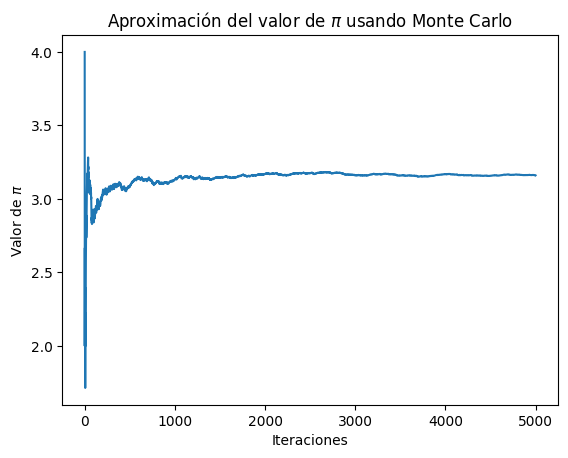

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

def funcion(x):
    return np.sqrt(1 - x**2)

def monte_carlo_pi(n):
    aciertos = 0
    area_aproximada = []

    for i in range(1, n + 1):
        u1, u2 = random.random(), random.random()
        x = u1  # como u1 ya está en el intervalo (0, 1), no es necesario ajustarlo
        y = funcion(x)

        if y > u2:
            aciertos += 1
        area_aproximada.append(4 * aciertos / i)

    return area_aproximada

n_iteraciones = 5000

aproximaciones_pi = monte_carlo_pi(n_iteraciones)

# Cálculo de la media de las aproximaciones
media_aproximaciones = np.mean(aproximaciones_pi)
print(f"Media de las aproximaciones de π: {media_aproximaciones}")

plt.plot(aproximaciones_pi)
plt.xlabel('Iteraciones')
plt.ylabel('Valor de $\pi$')
plt.title('Aproximación del valor de $\pi$ usando Monte Carlo')
plt.show()

**Paso 8**
Replique el modelo

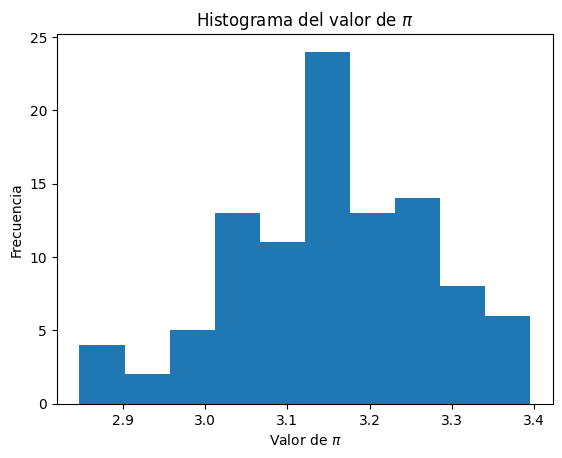

In [25]:
def simular_pi(repeticiones, exp):
    areas = []
    for _ in range(repeticiones):
        mediaexp = np.mean(experimentos(exp))
        areas.append(mediaexp)
    return areas

nreps = 100
nexp = 2000

resim = simular_pi(nreps, nexp)
mediasim = np.mean(resim)

plt.hist(resim)
plt.xlabel('Valor de $\pi$')
plt.ylabel('Frecuencia')
plt.title('Histograma del valor de $\pi$')
plt.show()
simu=simular_pi(100, 2000)

**Paso 9**
Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación estándar.

In [26]:
med = np.mean(simu)
var = np.var(simu)
desv = np.std(simu)
print(med,var,desv)

3.138732193151358 0.01465783046967043 0.12106952741986908


**Paso 10**
Halle el intervalo de confianza con un nivel del 95%

In [28]:
import scipy.stats as stats

# Definir los parámetros
confianza = 0.95
media = med # media muestral
desviacion = desv   # desviación estándar muestral
N = 100      # tamaño de la muestra

# Calcular el valor crítico Z
z_alpha_2 = stats.norm.ppf(1 - (1 - confianza) / 2)

# Calcular los límites del intervalo de confianza
l_inferior = media - z_alpha_2 * (desviacion / math.sqrt(N))
l_superior = media + z_alpha_2 * (desviacion / math.sqrt(N))

print(f"Intervalo de confianza al {confianza*100}% para la media poblacional:")
print(f"    {l_inferior} < μ < {l_superior}")

Intervalo de confianza al 95.0% para la media poblacional:
    3.1150030018145354 < μ < 3.162461384488181
